### Loading the data and training the model

#### Loading data

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('/content/drive/MyDrive/datasets/xai/hw2/diabetes.csv')

In [17]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### plots

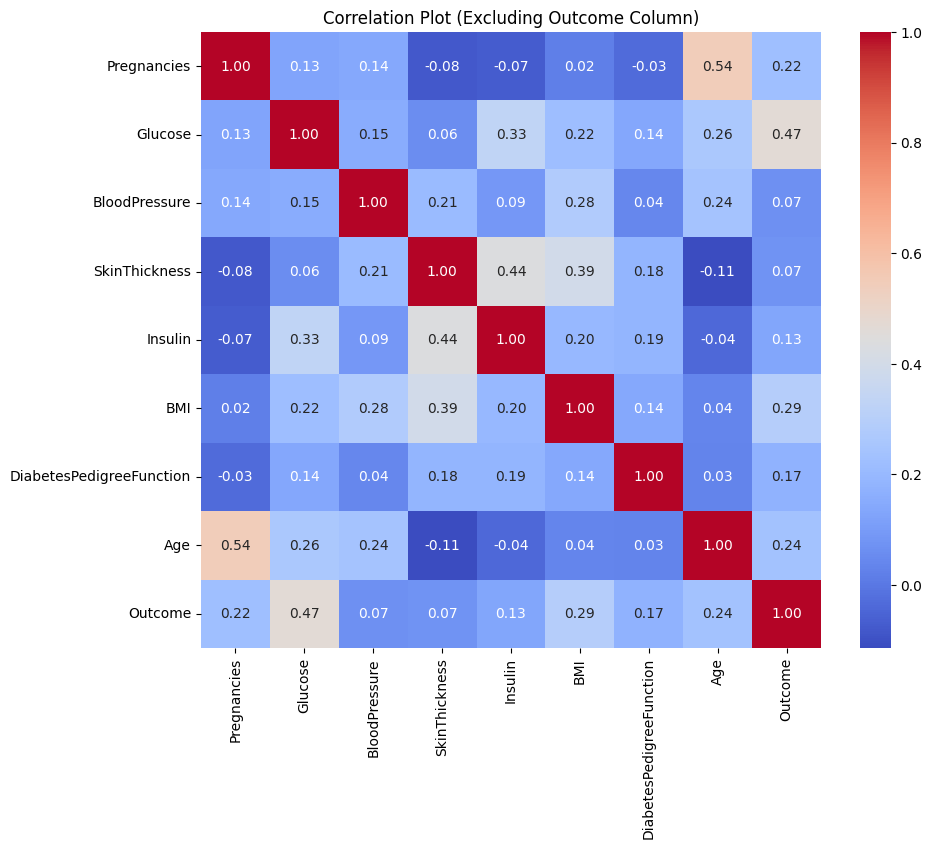

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot (Excluding Outcome Column)')
plt.show()

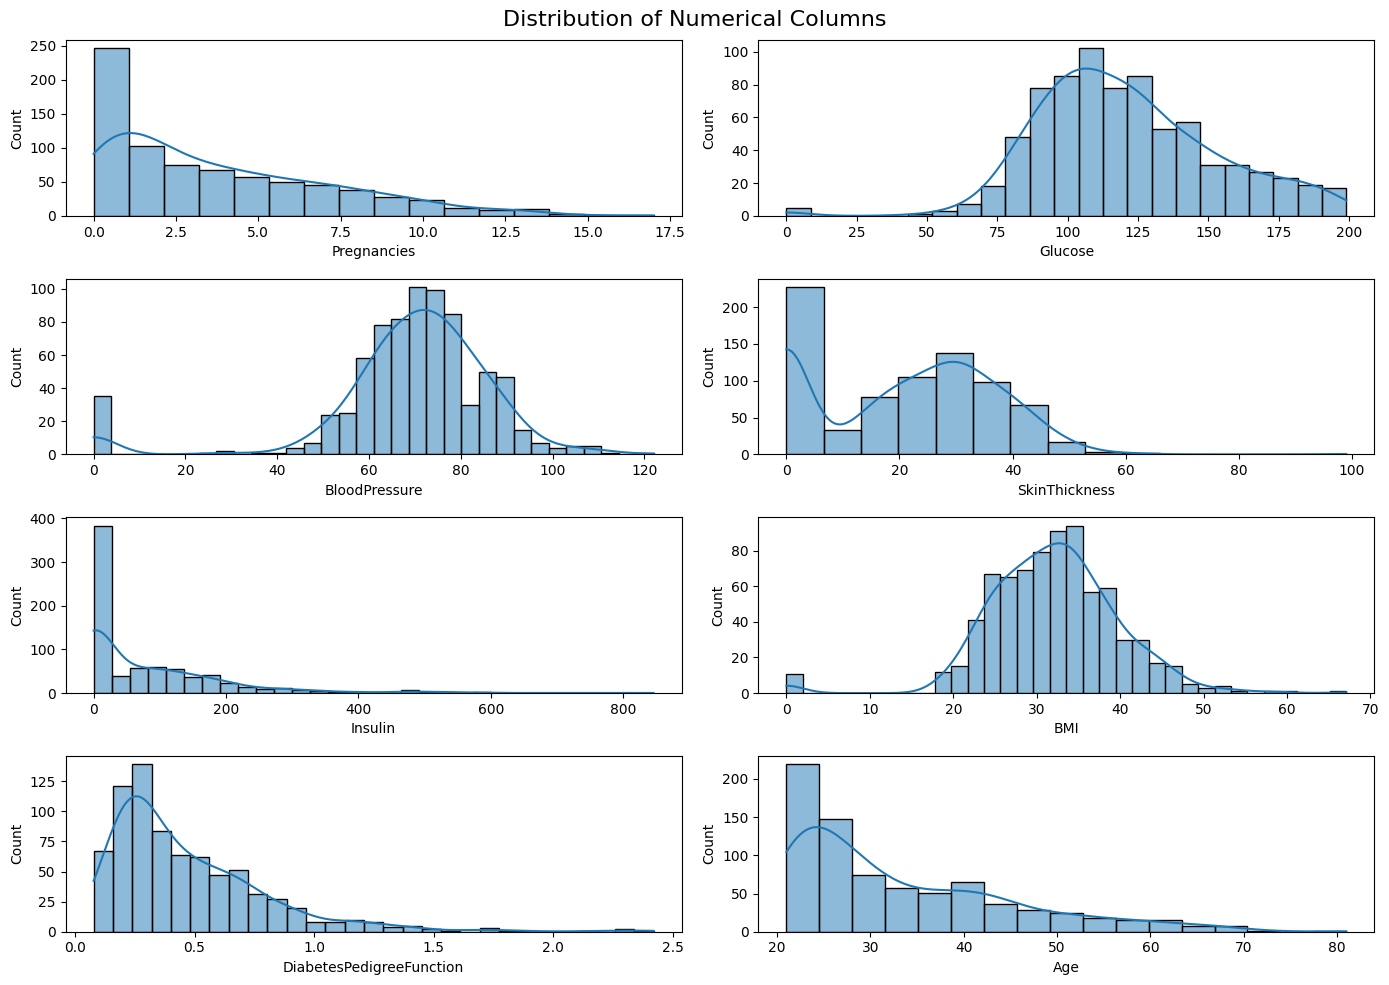

In [ ]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.drop(columns=['Outcome']).columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], kde=True, label=column)

plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [18]:
import numpy as np

columns_to_process = ['Insulin', 'SkinThickness']

for column_name in columns_to_process:
    mean_val = df[column_name].replace(0, np.nan).mean()
    df[column_name] = df[column_name].replace(0, mean_val)

In [19]:
columns_to_del = ['BMI', 'BloodPressure','Glucose']
df = df[(df[columns_to_del] != 0).all(axis=1)]


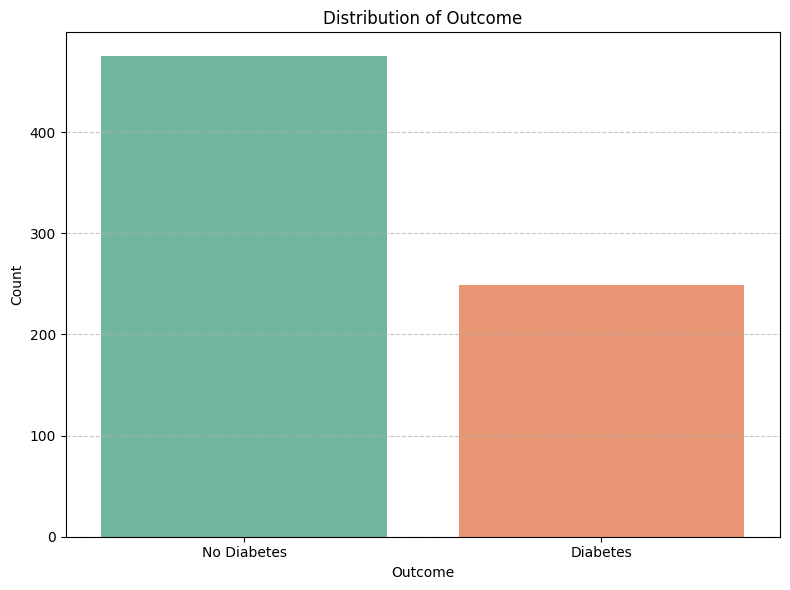

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome', hue='Outcome', palette='Set2', legend=False)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:

X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1 (10% of total data for validation)


### Training the model

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score


In [22]:


class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(8, 100)
    self.batch_norm1 = nn.BatchNorm1d(100)
    self.relu1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.linear2 = nn.Linear(100, 50)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(50, 50)
    self.relu3 = nn.ReLU()
    self.linear4 = nn.Linear(50, 20)
    self.relu4 = nn.ReLU()
    self.linear5 = nn.Linear(20, 1)

  def forward(self, x):
    x = self.linear1(x)
    x = self.batch_norm1(x)
    x = self.relu1(x)
    x = self.dropout1(x)
    x = self.linear2(x)
    x = self.relu2(x)
    x = self.linear3(x)
    x = self.relu3(x)
    x = self.linear4(x)
    x = self.relu4(x)
    x = self.linear5(x)

    return x



In [23]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

batch_size = 128


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
!pip install torchmetrics

In [25]:
from torchmetrics import Accuracy

train_losses = []
train_accuracies = []
eval_losses = []
eval_accuracies = []

model = Net()


optimizer = torch.optim.AdamW(model.parameters())

num_epochs = 20
accuracy = Accuracy(threshold=0.5, task='binary')

for epoch in range(num_epochs):
    total_train_loss = 0
    total_train_accuracy = 0


    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()

        output = model(data)
        loss = nn.BCEWithLogitsLoss()(output.squeeze(), target)
        loss.backward()
        optimizer.step()


        predictions = (output > 0.5).float()
        accuracy.update(predictions.squeeze(1), target)

        total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader)
    train_acc = accuracy.compute().item()
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)


    accuracy.reset()


    model.eval()
    total_eval_loss = 0
    total_eval_accuracy = 0

    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = nn.BCEWithLogitsLoss()(output.squeeze(), target)

            predictions = (output > 0.5).float()
            accuracy.update(predictions.squeeze(1), target)

            total_eval_loss += loss.item()

    eval_loss = total_eval_loss / len(val_loader)
    eval_acc = accuracy.compute().item()
    eval_losses.append(eval_loss)
    eval_accuracies.append(eval_acc)

    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Eval Loss: {:.4f}, Eval Acc: {:.4f}'.format(
        epoch + 1, num_epochs, train_loss, train_acc, eval_loss, eval_acc))

    accuracy.reset()


Epoch [1/20], Train Loss: 0.6817, Train Acc: 0.6364, Eval Loss: 0.6738, Eval Acc: 0.6986
Epoch [2/20], Train Loss: 0.6713, Train Acc: 0.6364, Eval Loss: 0.6605, Eval Acc: 0.6986
Epoch [3/20], Train Loss: 0.6586, Train Acc: 0.6364, Eval Loss: 0.6435, Eval Acc: 0.6986
Epoch [4/20], Train Loss: 0.6412, Train Acc: 0.6364, Eval Loss: 0.6194, Eval Acc: 0.6986
Epoch [5/20], Train Loss: 0.6169, Train Acc: 0.6364, Eval Loss: 0.5853, Eval Acc: 0.6986
Epoch [6/20], Train Loss: 0.5883, Train Acc: 0.6364, Eval Loss: 0.5428, Eval Acc: 0.6986
Epoch [7/20], Train Loss: 0.5534, Train Acc: 0.6364, Eval Loss: 0.4999, Eval Acc: 0.6986
Epoch [8/20], Train Loss: 0.5192, Train Acc: 0.6364, Eval Loss: 0.4667, Eval Acc: 0.6986
Epoch [9/20], Train Loss: 0.4938, Train Acc: 0.6462, Eval Loss: 0.4549, Eval Acc: 0.7534
Epoch [10/20], Train Loss: 0.4747, Train Acc: 0.6957, Eval Loss: 0.4541, Eval Acc: 0.8219
Epoch [11/20], Train Loss: 0.4632, Train Acc: 0.7451, Eval Loss: 0.4516, Eval Acc: 0.8082
Epoch [12/20], Trai

Exception ignored in: <function _xla_gc_callback at 0x795bceabd870>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


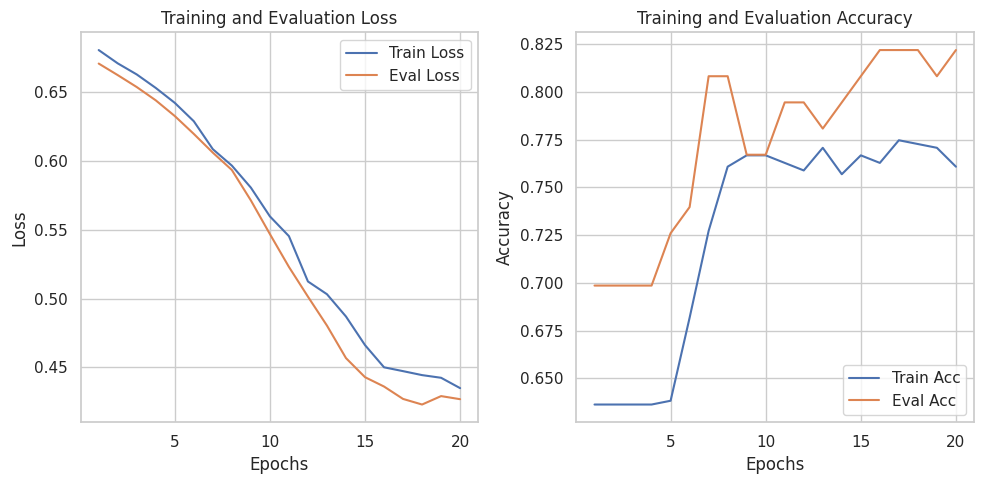

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, eval_losses, label='Eval Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, eval_accuracies, label='Eval Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Evaluation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

test_predictions = []
test_targets = []

model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        predictions = (output > 0.5).float()
        test_predictions.extend(predictions.squeeze(1).cpu().detach().numpy())
        test_targets.extend(target.cpu().detach().numpy())


test_predictions_np = np.array(test_predictions)
test_targets_np = np.array(test_targets)


precision = precision_score(test_targets_np, (test_predictions_np > 0.5))
recall = recall_score(test_targets_np, (test_predictions_np > 0.5))

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.675
Recall: 0.627906976744186


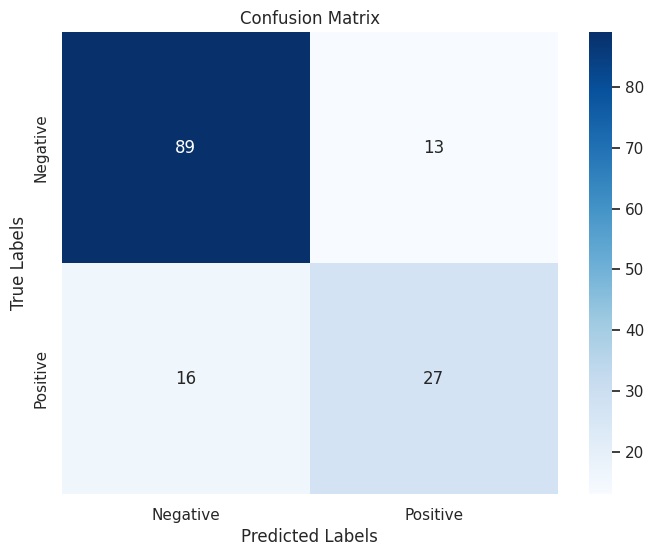

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_targets_np, (test_predictions_np > 0.5))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### LIME

In [ ]:
!pip install lime

In [40]:
import lime
from lime import lime_tabular


In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=list(df.columns[:-1]),
    class_names=['negative','positive'],
    mode='classification'
)


In [ ]:
def predict_proba_wrapper(X):
    model.eval()
    raw_predictions = model(torch.tensor(X, dtype=torch.float)).detach()
    probabilities = torch.sigmoid(raw_predictions)
    m_probabilities = 1-probabilities
    probabilities = torch.cat((probabilities,m_probabilities),dim=1)
    return probabilities.numpy()

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,  class_names=['negative','positive'], discretize_continuous=False, feature_names=df.columns)


In [ ]:
i=0
exp = explainer.explain_instance(X_test[i], predict_proba_wrapper, num_features=8, labels=y_test[i:i+1])
exp.show_in_notebook()

In [ ]:
i=1
exp = explainer.explain_instance(X_test[i], predict_proba_wrapper, num_features=8,labels=y_test[i:i+1],)
exp.show_in_notebook()

In [ ]:
i=2
exp = explainer.explain_instance(X_test[i], predict_proba_wrapper, num_features=8, labels=y_test[i:i+1])
exp.show_in_notebook()

### shapley

In [ ]:
!pip install shap


In [27]:
def predict_proba_wrapper(X):
    model.eval()
    raw_predictions = model(torch.tensor(X, dtype=torch.float)).detach()
    probabilities = torch.sigmoid(raw_predictions)  # Sigmoid function
    return probabilities.numpy()

In [ ]:
import shap
explainer = shap.KernelExplainer(predict_proba_wrapper, X_train,feature_names=df.columns)

i=0
shap_values = explainer.shap_values(X_test[i])
shap.initjs()

# Print the SHAP values
shap.force_plot(explainer.expected_value[0], shap_values.reshape(1,8), X_test[i], feature_names=df.columns[:8])

In [ ]:

i=1
shap_values = explainer.shap_values(X_test[i])
shap.initjs()

# Print the SHAP values
shap.force_plot(explainer.expected_value[0], shap_values.reshape(1,8), X_test[i],feature_names=df.columns[:8])

In [ ]:

i=2
shap_values = explainer.shap_values(X_test[i])
shap.initjs()

# Print the SHAP values
shap.force_plot(explainer.expected_value[0], shap_values.reshape(1,8), X_test[i],feature_names=df.columns[:8])

### GRACE

In [ ]:
!pip install texttable

In [ ]:
from fcn import *
from trainer import *
from utils import *

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/datasets/xai/hw2/diabetes.csv')

df.rename(columns={'Outcome': 'class'}, inplace=True)


df.to_csv('updated_dataframe.csv', index=False)


In [ ]:
scaler, le, _, _, features, train_data, val_data, test_data = read_data(
        '/content/updated_dataframe.csv', 0)

In [ ]:
def load_model(train_data, hiddens):
    num_feat = train_data.getX().shape[1]
    num_class = len(np.unique(train_data.gety()))
    scaler = StandardScaler(with_std=True)
    scaler.fit(train_data.getX())
    stds = np.sqrt(scaler.var_)
    model = FCN(num_feat, num_class, hiddens)
    return model

model = load_model(train_data, hiddens = [10, 5])


In [ ]:
trainer = Trainer(model, lrate=0.01, lr_reduce_rate=1)


In [ ]:
trainer.train(train_dataset=train_data,
              val_dataset=val_data,
              patience=5,
              num_epochs=50,
              batch_size=256)

torch.save(model.state_dict(), 'model.pth')

_, val_acc, val_f1, val_pred = trainer.validate(val_data)
_, test_acc, test_f1, test_pred = trainer.validate(test_data)
print_performance(val_acc, val_f1, test_acc, test_f1)

Training...
Val loss: 0.5944 Val acc: 0.6429

  Dataset     Accuracy    F1  
Validation    0.671     0.648
Test          0.714     0.682


In [ ]:
def wrapperr(train_data):
  probs = trainer.predict_proba(train_data)
  probs = probs.reshape(int(len(probs)/2),2)
  return probs

In [ ]:
def apply_softmax(data):
    softmax_output = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), axis=1, arr=wrapperr(train_data.X))
    return softmax_output

In [ ]:
import shap

explainer = shap.KernelExplainer(wrapperr, train_data.X, logits=False ,feature_names=df.columns[:8])

i=6
shap_values = explainer.shap_values(test_data.X[i])
shap.initjs()

# Print the SHAP values
shap.force_plot(explainer.expected_value[0], shap_values[:,0].reshape(1,8), test_data.X[i], feature_names=df.columns[:8])